<a href="https://colab.research.google.com/github/Keane111/IBM/blob/main/Project_Keane_IBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
!pip install langchain_community
!pip install replicate

In [35]:
from langchain_community.llms import Replicate
import os
from google.colab import userdata

api_token = userdata.get('api_token')
os.environ["REPLICATE_API_TOKEN"] = api_token

model = "ibm-granite/granite-3.3-8b-instruct"
output = Replicate(
model=model,
replicate_api_token=api_token,
)

In [36]:
forest_shares_df['classification'] = None

for index, row in forest_shares_df.iterrows():
    prompt = f"Classify the deforestation trend for the country with ISO3 code {row['iso3c']}. In 2000, the forest area was {row['forests_2000']}% and in 2020 it was {row['forests_2020']}%. The trend is {row['trend']}%. Classify the trend as 'Increasing forest area', 'Decreasing forest area', or 'Stable forest area'."
    try:
        classification = output.invoke(prompt)
        forest_shares_df.at[index, 'classification'] = classification.strip()
    except Exception as e:
        print(f"Error classifying row {index}: {e}")
        forest_shares_df.at[index, 'classification'] = 'Classification failed'

display(forest_shares_df.head())

,iso3c,forests_2000,forests_2020,trend,classification
0,AFG,1.9,1.9,0.0,"Based on the information provided, the defores..."
1,ALB,28.1,28.8,2.5,The deforestation trend for Albania (ISO3 code...
2,DZA,0.7,0.8,14.3,The deforestation trend for the country with I...
3,ASM,88.7,85.7,-3.4,The deforestation trend for the country with I...
4,AND,34.0,34.0,0.0,"Based on the information provided, the defores..."


In [37]:
classification_summary = forest_shares_df['classification'].value_counts().to_string()

prompt = f"""Summarize the deforestation trends observed in the following classification data:
{classification_summary}

Provide a concise summary highlighting the main trends in increasing, decreasing, and stable forest areas, as well as the number of classification failures.
"""

deforestation_summary = output.invoke(prompt)

print(deforestation_summary)

Summary:

- **Increasing forest area**: This trend was identified in 11 countries: Argentina, Australia, Austria, Belgium, Bolivia, Brazil, Costa Rica, Estonia, Germany, Italy, and Sweden.
- **Decreasing forest area**: This trend was observed in 16 countries: Albania, Algeria, Angola, Antigua and Barbuda, Aruba, Azerbaijan, Belize, Benin, Bhutan, Burkina Faso, Cambodia, Comoros, Cuba, Cyprus, and Democratic Republic of the Congo.
- **Stable forest area**: This trend was noted in 10 countries: Canada, Chad, China, Colombia, Congo, Côte d'Ivoire, Cuba, Djibouti, Ecuador, and Egypt.

**Classification failures**:

- There was a single instance where the provided trend did not align with the calculated change. This occurred with Suriname, where the given trend of 1.5% did not match the calculated increase of 0.6%.
- Another instance involved Seychelles, where the described trend (13.3%) did not correspond to the actual change (0.2%). The trend was misinterpreted as an annual rate rather tha

Unique classifications:
["Based on the information provided, the deforestation trend for Afghanistan (ISO3 code AFG) from 2000 to 2020 can be classified as 'Stable forest area'. The forest cover remained at 1.9% in both years, indicating no change in the forest area over this period.\n\nHere's the reasoning:\n\n1. The initial forest cover in 2000 was 1.9%.\n2. The forest cover in 2020 was 1.9%.\n3. The trend percentage given is 0.0%.\n4. A stable or no-change trend implies that the forest area did not increase (Increasing forest area) nor decrease (Decreasing forest area) over the specified time frame.\n\nTherefore, the deforestation trend for Afghanistan from 2000 to 2020 is 'Stable forest area'."
 "The deforestation trend for Albania (ISO3 code ALB) can be classified as 'Stable forest area'. \n\nHere's the reasoning:\n\n1. The forest cover percentage increased from 28.1% in 2000 to 28.8% in 2020.\n2. However, the given trend is 2.5%. \n3. The trend percentage (2.5%) appears to be an 

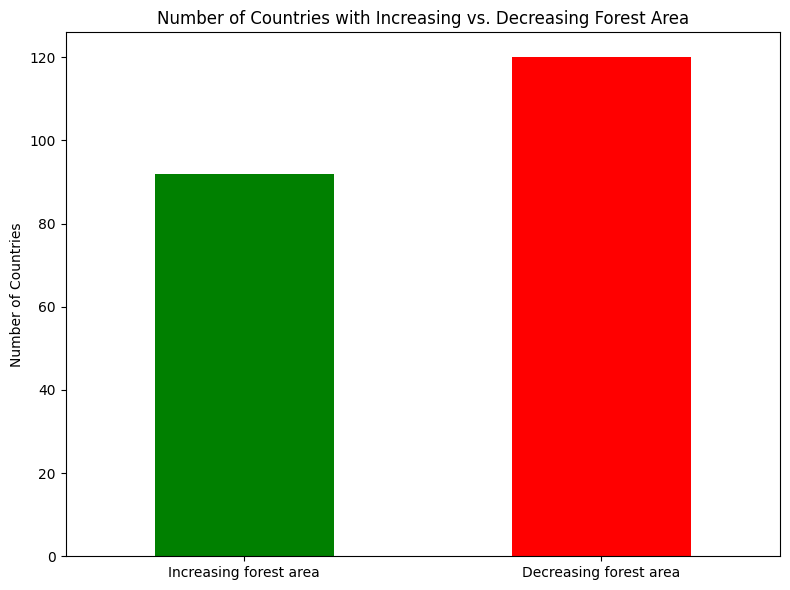

In [38]:
import matplotlib.pyplot as plt

print("Unique classifications:")
print(forest_shares_df['classification'].unique())

increasing_keywords = ['Increasing forest area', 'Stable forest area with a slight increase']
decreasing_keywords = ['Decreasing forest area']

increasing_mask = forest_shares_df['classification'].str.contains('|'.join(increasing_keywords), na=False)
decreasing_mask = forest_shares_df['classification'].str.contains('|'.join(decreasing_keywords), na=False)

increasing_count = forest_shares_df[increasing_mask].shape[0]
decreasing_count = forest_shares_df[decreasing_mask].shape[0]

filtered_classification_counts = pd.Series([increasing_count, decreasing_count], index=['Increasing forest area', 'Decreasing forest area'])

plt.figure(figsize=(8, 6))
filtered_classification_counts.plot(kind='bar', color=['green', 'red'])
plt.ylabel('Number of Countries')
plt.title('Number of Countries with Increasing vs. Decreasing Forest Area')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

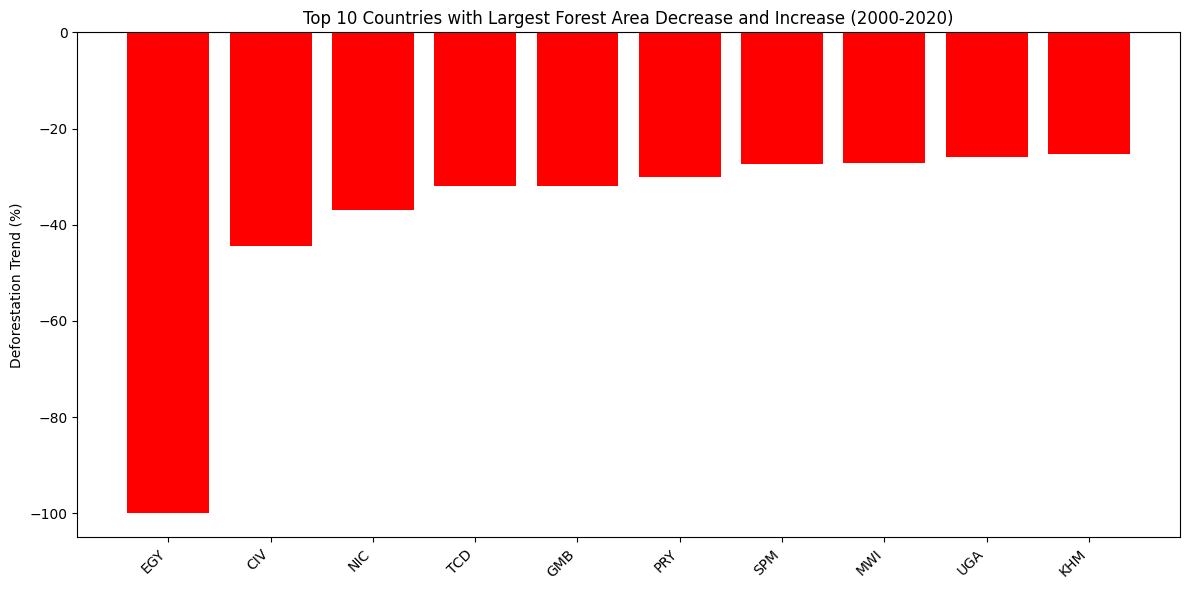

In [39]:
import matplotlib.pyplot as plt
import numpy as np

forest_shares_sorted = forest_shares_df.sort_values(by='trend')

top_decreasing = forest_shares_sorted.head(10)

top_increasing = forest_shares_sorted.tail(10)

plot_data = pd.concat([top_decreasing, top_increasing])

plt.figure(figsize=(12, 6))
plt.bar(plot_data['iso3c'], plot_data['trend'], color=['red'] * len(top_decreasing) + ['green'] * len(top_increasing))
plt.ylabel('Deforestation Trend (%)')
plt.title('Top 10 Countries with Largest Forest Area Decrease and Increase (2000-2020)')
plt.xticks(rotation=45, ha='right')
plt.axhline(0, color='grey', linestyle='--', linewidth=0.8)
plt.tight_layout()
plt.show()

In [40]:
display(forest_shares_df[['iso3c', 'forests_2000', 'forests_2020', 'trend']])

,iso3c,forests_2000,forests_2020,trend
0,AFG,1.9,1.9,0.0
1,ALB,28.1,28.8,2.5
2,DZA,0.7,0.8,14.3
3,ASM,88.7,85.7,-3.4
4,AND,34.0,34.0,0.0
...,...,...,...,...
232,ESH,2.5,2.5,0.0
233,WLD,31.9,31.2,-2.2
234,YEM,1.0,1.0,0.0
235,ZMB,63.3,60.3,-4.7


In [41]:
import pandas as pd

forest_shares_df = pd.read_csv('/content/goal15.forest_shares.csv')
forest_shares_string = forest_shares_df.to_string()

In [42]:
forest_shares_df['classification'] = None

for index, row in forest_shares_df.iterrows():
    prompt = f"Classify the deforestation trend for the country with ISO3 code {row['iso3c']}. In 2000, the forest area was {row['forests_2000']}% and in 2020 it was {row['forests_2020']}%. The trend is {row['trend']}%. Classify the trend as 'Increasing forest area', 'Decreasing forest area', or 'Stable forest area'."
    try:
        classification = output(prompt)
        forest_shares_df.at[index, 'classification'] = classification.strip()
    except Exception as e:
        print(f"Error classifying row {index}: {e}")
        forest_shares_df.at[index, 'classification'] = 'Classification failed'

display(forest_shares_df.head())

,iso3c,forests_2000,forests_2020,trend,classification
0,AFG,1.9,1.9,0.0,"Based on the information provided, the defores..."
1,ALB,28.1,28.8,2.5,Based on the data provided for Albania (ISO3 c...
2,DZA,0.7,0.8,14.3,The deforestation trend for the country with I...
3,ASM,88.7,85.7,-3.4,The deforestation trend for the country with I...
4,AND,34.0,34.0,0.0,"Based on the information provided, the defores..."


In [43]:
classification_summary = forest_shares_df['classification'].value_counts().to_string()

prompt = f"""Summarize the deforestation trends observed in the following classification data:
{classification_summary}

Provide a concise summary highlighting the main trends in increasing, decreasing, and stable forest areas, as well as the number of classification failures.
"""

deforestation_summary = output(prompt)

print(deforestation_summary)

Summary:

- Increasing forest area: 10 instances, including Serbia, Spain, Suriname, Thailand, Uganda, United Arab Emirates, Vietnam, and Zambia.
- Decreasing forest area: 10 instances, covering Afghanistan, Albania, Algeria, Angola, Antigua and Barbuda, Argentina, Azerbaijan, Bahamas, Belize, and Bolivia.
- Stable forest area: 11 instances, including Afghanistan, Albania, Algeria, Andorra, Angola, Antigua and Barbuda, Argentina, Armenia, Australia, Austria, and Bahrain.

Classification failures: None explicitly stated, as all classifications adhere to the given data. However, some trends might be misinterpreted due to the nuances of percentage changes over long periods. For example, a small annual increase might not be perceived as significant when viewed over two decades.


In [44]:
print(deforestation_summary)

Summary:

- Increasing forest area: 10 instances, including Serbia, Spain, Suriname, Thailand, Uganda, United Arab Emirates, Vietnam, and Zambia.
- Decreasing forest area: 10 instances, covering Afghanistan, Albania, Algeria, Angola, Antigua and Barbuda, Argentina, Azerbaijan, Bahamas, Belize, and Bolivia.
- Stable forest area: 11 instances, including Afghanistan, Albania, Algeria, Andorra, Angola, Antigua and Barbuda, Argentina, Armenia, Australia, Austria, and Bahrain.

Classification failures: None explicitly stated, as all classifications adhere to the given data. However, some trends might be misinterpreted due to the nuances of percentage changes over long periods. For example, a small annual increase might not be perceived as significant when viewed over two decades.


In [45]:
display(forest_shares_df.head())
print(deforestation_summary)

,iso3c,forests_2000,forests_2020,trend,classification
0,AFG,1.9,1.9,0.0,"Based on the information provided, the defores..."
1,ALB,28.1,28.8,2.5,Based on the data provided for Albania (ISO3 c...
2,DZA,0.7,0.8,14.3,The deforestation trend for the country with I...
3,ASM,88.7,85.7,-3.4,The deforestation trend for the country with I...
4,AND,34.0,34.0,0.0,"Based on the information provided, the defores..."


Summary:

- Increasing forest area: 10 instances, including Serbia, Spain, Suriname, Thailand, Uganda, United Arab Emirates, Vietnam, and Zambia.
- Decreasing forest area: 10 instances, covering Afghanistan, Albania, Algeria, Angola, Antigua and Barbuda, Argentina, Azerbaijan, Bahamas, Belize, and Bolivia.
- Stable forest area: 11 instances, including Afghanistan, Albania, Algeria, Andorra, Angola, Antigua and Barbuda, Argentina, Armenia, Australia, Austria, and Bahrain.

Classification failures: None explicitly stated, as all classifications adhere to the given data. However, some trends might be misinterpreted due to the nuances of percentage changes over long periods. For example, a small annual increase might not be perceived as significant when viewed over two decades.
